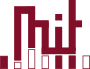 Department of Artificial Intelligence and Systems Engineering, ©2024, BME-MIT, Gabor Revy, Dr. Gabor Hullam  
# **VIMIAC16 - Artificial Intelligence**
## 2024 Fall Semester
## **LAB 2 - CSP**

# Constraint Satisfaction Problems

Constraint satisfaction problems (CSP) can be defined by the triplet $\langle X, D, C \rangle$:
- $X = \{X_1, \ldots, X_n\}$ is the set of variables
- $D = \{D_1, \ldots, D_n\}$ is the non-empty domain of possible values for these variables
- $C = \{C_1, \ldots, C_m\}$ is the set of constraints

The goal is to find an assignment of the $X_i$ variables from the $D_i$ domains that satisfies the $C_i$ constraints.

For a detailed description and examples of CSPs, see [here](http://project.mit.bme.hu/mi_almanach/books/aima/ch05s01).

In this lab, we will use the [OR-TOOLS](https://developers.google.com/optimization) constraint programming library. You can install it by running the following code block.

In [ ]:
# @title Install, download
print('0/2 INSTALL STARTED')
!pip install ortools &> /dev/null
print('1/2 INSTALL DONE')
!wget -q -O helpers.zip https://gist.github.com/revygabor/9a84a459fd26d46cbbc656ca9b0e17b0/archive/d500e6e4f4b5efdabf809a38ebdce4e404aa6973.zip
!unzip -qj helpers.zip
print('2/2 DOWNLOAD DONE')

0/2 INSTALL STARTED
1/2 INSTALL DONE
2/2 DOWNLOAD DONE


# Task Description

When solving the tasks, variables, their domains, and constraints must be defined. The domains of the variables are determined during their definition.

### Example Code Snippets Necessary for the Solution:

- Importing the library
  ```python
  from ortools.sat.python import cp_model
  ```

- Creating a model to solve the CSP problem
  ```python
  model = cp_model.CpModel()
  ```

- Defining a variable named $x$ that takes an integer value between 1 and 10
  ```python
  x = model.NewIntVar(1, 10, "x")
  ```

- Defining a constraint related to previously defined variables x, y
  - ```python
  model.Add(3 * x + 5 * y <= 48)
  ```
  
  - For a "not equal" constraint, the != operator can be used.
  - The constraint of multiple variables being different can be added to the model with a list.
  ```python
  model.AddAllDifferent([x, y, z])
  ```

- If there is an objective function—e.g., maximization—it can be formulated after defining the variables (we won't use an objective function during this lab).
<br/> ```model.Maximize(3 * x + 2 * y)```

- Next, the search for a solution begins.
<br/> ```solver = cp_model.CpSolver()```
<br/> ```status = solver.Solve(model)```

- The result of the run can be retrieved as follows:
  - The ```status``` variable is an "[enum](https://developers.google.com/optimization/cp/cp_solver#cp-sat_return_values)", the state can be obtained textually with the code ```solver.StatusName(status)```
  - By default, the program returns the first solution.
  <br/> ```solution_x = solver.Value(x)```
  <br/> If multiple solutions are desired, a callback function needs to be written (this will not be covered in the lab).


The code should only be completed at the places marked with __TODO__.

## Cryptarithmetic

The first task is to solve a cryptarithmetic puzzle.

\begin{array}{}
  & S & E & N & D \\
+ & M & O & R & E \\ \hline
M & O & N & E & Y \\
\end{array}

In this puzzle, different letters represent different digits, while identical letters represent the same digit. When defining the variables, it is important to pay attention to the domains of the initial letters of the words.

In [ ]:
%reset -f

from ortools.sat.python import cp_model

"""Solve the SEND+MORE==MONEY cryptarithm."""
"""
  SEND
+ MORE
------
 MONEY
"""
# Create CP model
model = cp_model.CpModel()

base = 10

# Create variables and define their intervals.
# Mind the first letters of the words!
# TODO
# s =
# e =
# ...

# We need to group variables in a list to use the constraint AllDifferent.
letters = [s, e, n, d, m, o, r, y]

# Define constraints.
# 1) All letters have a different value.
# TODO

# 2) SEND + MORE = MONEY
# TODO

# Create a solver and solves the model.
solver = cp_model.CpSolver()
# Enumerate all solutions.
solver.parameters.enumerate_all_solutions = True
# Solve.
status = solver.Solve(model)

# Result.
print(f"status: {solver.StatusName(status)}")
print(f"assignment:")
for l in letters:
  print(f'\t{l}: {solver.Value(l)}')
print(f"{''.join([str(solver.Value(l)) for l in [s, e, n, d]])} + "
f"{''.join([str(solver.Value(l)) for l in [m, o, r, e]])} =? "
f"{''.join([str(solver.Value(l)) for l in [m, o, n, e, y]])}")

The task has a unique solution with the following assignments:

| Letter | Value |
| ------ | ----- |
| S      | 9     |
| E      | 5     |
| N      | 6     |
| D      | 7     |
| M      | 1     |
| O      | 0     |
| R      | 8     |
| Y      | 2     |


## Map Coloring

Since the [Four color theorem](https://en.wikipedia.org/wiki/Four_color_theorem), we know that every planar graph can be colored with four colors. Our goal is to color the countries on a continent in such a way that neighboring countries cannot share the same color. The constraint graph for this problem is planar, so theoretically, the task is solvable.


To start, we first need to download a world map and then load a continent, for example Africa.

In [ ]:
%reset -f

import geopandas as gpd
import matplotlib.pyplot as plt
from map_coloring_helper import get_bordering_countries, plot_colored_map

# Load world map from file and select a continent
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
print(f"continents: {', '.join(world['CONTINENT'].unique())}")
world[['CONTINENT', 'SOVEREIGNT']]

In [ ]:
continent_name = 'Africa'
continent = world[world['CONTINENT'] == continent_name].copy().reset_index(drop=True)

# Plot continent
continent.plot(color='white', edgecolor='black')
plt.axis('off');

Let the colors be represented by integers, and we will formulate the constraints accordingly.

The variable ```bordering_country_index_pairs``` contains pairs of indices for neighboring countries on the continent.

In [ ]:
from ortools.sat.python import cp_model

# Define the constraints for the map coloring problem
def map_coloring_csp(map_):
    model = cp_model.CpModel()
    # set number of colors
    num_colors =   # TODO
    num_countries = len(map_)

    # Create the variables:
    # There are `num_countries` number of variables, each encoding the color (integer) of a country.
    # TODO
    # country_colors = [... for i in range(num_countries)]

    # Calculate index pairs of bordering countries (returns list of tuples)
    bordering_country_index_pairs = get_bordering_countries(map_)

    # Define constraints
    # 1) Bordering countries cannot have the same color
    # TODO
    # for c1, c2 in bordering_country_index_pairs:
    #   ...

    # Use ortools to solve the CSP problem
    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    print(f'Status: {solver.StatusName(status)}')
    if status == cp_model.OPTIMAL:
        coloring = [solver.Value(color) for color in country_colors]
        return coloring
    else:
        print("No solution found.")
        return None

coloring = map_coloring_csp(continent)
if coloring:
    plot_colored_map(continent, coloring)

## N Queens Problem

The task is a generalization of the eight queens problem: on an $n \times n$ chessboard, we need to place $n$ queens such that no two queens threaten each other. This means that no two queens can occupy the same row, column, or diagonal. Since there is exactly one queen in each column, we will identify them by their column indices, and the variables will contain the row indices. Our goal is to find all possible solutions.

In [ ]:
%reset -f

from ortools.sat.python import cp_model
from n_queens_helper import NQueenSolutionPrinter

def solve_n_queens(board_size):
    # Create solver
    model = cp_model.CpModel()

    # Create the variables:
    # There are `board_size` number of variables, one for a queen in each column
    # of the board. The value of each variable is the row that the queen is in.
    # TODO
    # queens = [... for i in range(board_size)]

    # Create constraints
    # 1) All rows must be different.
    # TODO

    # 2) No two queens can be on the same diagonal.
    # TODO

    # Solve the model.
    solver = cp_model.CpSolver()
    solution_printer = NQueenSolutionPrinter(queens)
    solver.parameters.enumerate_all_solutions = True
    solver.Solve(model, solution_printer)

    # Statistics.
    print("\nStatistics")
    print(f"  conflicts      : {solver.NumConflicts()}")
    print(f"  branches       : {solver.NumBranches()}")
    print(f"  wall time      : {solver.WallTime()} s")
    print(f"  solutions found: {solution_printer.solution_count()}")

chess_board_size = 8
solve_n_queens(chess_board_size)

# **Submission**

**In this task, the goal is to create a [sudoku](https://en.wikipedia.org/wiki/Sudoku) solver.**

# Task description

The essence of sudoku is briefly as follows:

- There is a $9\times9$ grid, containing 9 $3\times3$ sub-grids.
- The aim is to fill the grid with the numbers $1, 2, ..., 8, 9$ such that:
  - each row
  - each column
  - each sub-grid \
  contains each of the numbers $1...9$ exactly once.
- The grid is partially pre-filled with numbers.

# Specification

You must upload a Python file named `sudoku_solver.py` to the Moodle platform. It must implement a function named `solve_sudoku` that takes the pre-filled grid and returns a solution in the same format. **The format of the grid is**: a list of lists, where the 1st index refers to the row and the 2nd index refers to the column. The empty cells of the board are represented with 0. So the file to be uploaded should look something like this:

```python
from ortools.sat.python import cp_model
import math

def solve_sudoku(board):
    solution = ...
    return solution
```


#Useful Information
##Solution Environment
It is recommended to use the ortools library for the solution. This is also available on the evaluation server.

##Scoring
The evaluation will be based on 4 grids with different levels of filling ($0.2, 0.5, 0.8$, and $0.9$), worth $1, 3, 4$, and $4$ points respectively. If the uploaded solution reaches 8 points, the lab assignment is accepted by Moodle.

# Submission

The Moodle submission interface can be accessed via this link:

https://edu.vik.bme.hu/mod/quiz/view.php?id=151358

In [ ]:
from ortools.sat.python import cp_model
import math

class SolutionCollector(cp_model.CpSolverSolutionCallback):
    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)  # add to model as callback
        self.__variables = variables
        self.__board_size = int(len(variables) ** 0.5)
        self.__solutions = []

    def on_solution_callback(self):
        solution = [[0] * self.__board_size for _ in range(self.__board_size)]
        for i in range(self.__board_size):
            for j in range(self.__board_size):
                solution[i][j] = self.Value(self.__variables[(i, j)])
        self.__solutions.append(solution)

    def get_solutions(self):
        return self.__solutions


def solve_sudoku(board):
  size = len(board)
  model = create_solver()
  variables = create_variables(model, size)

  add_row_constraints(model, variables, size)
  add_column_constraints(model, variables, size)
  add_subgrid_constraints(model, variables, size)
  add_filled_cell_constraints(model, variables, size, board)

  solver = cp_model.CpSolver()
  solution_collector = SolutionCollector(variables)
  # status = solver.SearchForAllSolutions(model, solution_collector)
  status = solver.Solve(model, solution_collector)
  import time
  time.sleep(1) # Sleep for 3 seconds

  return solution_collector.get_solutions()[0]